In [24]:
import glob
import pandas as pd
import numpy as np
import os

In [25]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [26]:
# all_file= glob.glob("../Data/*.xlsx")
all_file = glob.glob("./songData/*.xlsx")
len(all_file)

21

# Preprocessing steps

In [27]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[1])
#     names.append(each.split('/')[1][:-5])
#     clusters.append(temp['idx'].iloc[4])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [28]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
107,3504,চঞ্চল মন আনমনা হয় যে তার ছোঁয়া লাগে।। ভোরের আক...,12
131,1022,এ হৃদয় কাননে প্রতিদিন যে ভোরে কত ফুল ফোটে আর য...,13
384,1597,যে ভাবেই বাঁচি বেঁচে তো আছি জীবন আর মরণের মাঝা...,1
574,2530,বাক্সে বাক্সে বন্দী বাক্স বাক্সে বাক্সে বন্দী ...,1
929,3865,কবিতা পড়ার প্রহর এসেছে রাতের নির্জনে। জোনাকীর...,1
...,...,...,...
540,3091,"তুমি যে আমার, ওগো তুমি যে আমার তুমি যে আমার, ও...",3
449,2019,ডাক্তার বলছে ক্যালসিয়ামটা কম টিউটর বলছে অংকটা ...,1
26,1303,আমি দেখেছি জীবন ভ’রে চাহিয়া কত ; তুমি আমারে যা...,12
355,1325,তুমি জানবে না কোনদিন কোথায় আছি একলা আমি কেমন ...,1


### Removing  Stopwords  from body if exists

In [41]:
# stopwords = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]
stopwords = ['হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ', 'অবশ্য',
'অনেক',
'অনেকে',
'অনেকেই',
'অন্তত',
'অথবা',
'অথচ',
'অর্থাত',
'অন্য',
'আজ',
'আছে',
'আপনার',
'আপনি',
'আবার',
'আমরা',
'আমাকে',
'আমাদের',
'আমার',
'আমি',
'আরও',
'আর',
'আগে',
'আগেই',
'আই',
'অতএব',
'আগামী',
'অবধি',
'অনুযায়ী',
'আদ্যভাগে',
'এই',
'একই',
'একে',
'একটি',
'এখন',
'এখনও',
'এখানে',
'এখানেই',
'এটি',
'এটা',
'এটাই',
'এতটাই',
'এবং',
'একবার',
'এবার',
'এদের',
'এঁদের',
'এমন',
'এমনকী',
'এল',
'এর',
'এরা',
'এঁরা',
'এস',
'এত',
'এতে',
'এসে',
'একে',
'এ',
'ঐ',
 'ই',
'ইহা',
'ইত্যাদি',
'উনি',
'উপর',
'উপরে',
'উচিত',
'ও',
'ওই',
'ওর',
'ওরা',
'ওঁর',
'ওঁরা',
'ওকে',
'ওদের',
'ওঁদের',
'ওখানে',
'কত',
'কবে',
'করতে',
'কয়েক',
'কয়েকটি',
'করবে',
'করলেন',
'করার',
'কাছে',
'কাজে',
'কারণ',
'কিছু',
'কিছুই',
'কিন্তু',
'কিংবা',
'কি',
'কী',
'কেন',
'কে',
'কোনও',
'কোনো',
'ক্ষেত্রে',
'খুব',
'গুলি'
'গিয়ে',
'গোটা',
'চলে',
'ছাড়া',
'ছাড়াও',
'ছিলেন',
'ছিল',
'জন্য',
'জানা',
'ঠিক',
'তিনি',
'তিনঐ',
'তিনিও',
'তেমন',
'তাকে',
'তাহা',
'তাহাতে',
'তাহার',
'তাদের',
'তিনি',
'তা',
'তুমি',
'তোমার',
'তথা',
'না',
'পারে',
'ব্যবহার',
'বললেন',
'যখন',
'যদি',
'টি' ]


In [30]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
# data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [31]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )
# X_train, X_test, y_train, y_test =  train_test_split(data['content'], data['idx'], test_size=0.33, random_state=42 )

In [32]:
X_train.shape

(2750,)

In [33]:
X_test.shape

(1355,)

### Classification report

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
# unique_classes = np.unique(data['idx'].values)
unique_classes = np.unique(data['songType'].values)

class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stopwords,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss = 'modified_huber', penalty='l2', max_iter=100)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

/home/pulock46/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Cross Accuracy: 0.52 (+/- 0.04)


In [35]:
# 

In [36]:
# joblib.dump(classifier, '../Model/sample_model.pickle')

In [37]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.52 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.49      0.56      0.52       360
           2       0.00      0.00      0.00         2
           3       0.38      0.59      0.46       239
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        21
           6       0.50      0.33      0.40        27
           7       0.78      0.28      0.41        76
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        19
          10       0.67      0.14      0.24        14
          11       0.00      0.00      0.00        24
          12       0.33      0.07      0.12        56
          13       0.51      0.50      0.50       212
          14       1.00      0.15      0.26        20
          16       0.00      0.00      0.00         0
          17       0.79      0.90      0.84      

/home/pulock46/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pulock46/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

print(len(confusion_matrix), len(confusion_matrix[0]))
print(len(names), len(names[0]))

20 20
21 10


<AxesSubplot:>

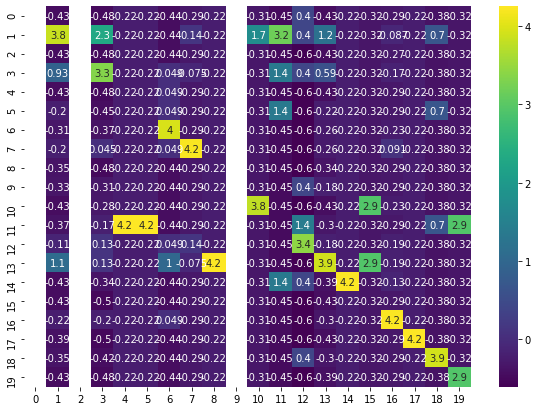

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
# df_cm = pd.DataFrame(array, index = [i for i in names],
#               columns = [i for i in names])
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')